In [37]:
import numpy as np
import math
import pandas
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def read_file(fn):
    # load data
    filename = fn
    with open(filename,'r') as csvfile:
        reader = csv.reader(csvfile)
        country = []
        year = []
        pop = []
        cont = []
        lifeExp = []
        gdp = []
        for row in reader:
            if row[0] != 'country':
                country.append(row[0])
                year.append(int(row[1]))
                pop.append(row[2])
                cont.append(row[3])
                lifeExp.append(float(row[4]))
                gdp.append(row[5])

In [49]:
read_file('data/gapminder.csv')

In [51]:
df = pandas.read_csv('data/gapminder.csv')

In [52]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [166]:
df=df.rename(columns={"pop": "Pop"})

In [167]:
df.Pop

0        8425333.0
1        9240934.0
2       10267083.0
3       11537966.0
4       13079460.0
5       14880372.0
6       12881816.0
7       13867957.0
8       16317921.0
9       22227415.0
10      25268405.0
11      31889923.0
12       1282697.0
13       1476505.0
14       1728137.0
15       1984060.0
16       2263554.0
17       2509048.0
18       2780097.0
19       3075321.0
20       3326498.0
21       3428038.0
22       3508512.0
23       3600523.0
24       9279525.0
25      10270856.0
26      11000948.0
27      12760499.0
28      14760787.0
29      17152804.0
           ...    
1674     9657618.0
1675    11219340.0
1676    13367997.0
1677    15826497.0
1678    18701257.0
1679    22211743.0
1680     2672000.0
1681     3016000.0
1682     3421000.0
1683     3900000.0
1684     4506497.0
1685     5216550.0
1686     6100407.0
1687     7272406.0
1688     8381163.0
1689     9417789.0
1690    10595811.0
1691    11746035.0
1692     3080907.0
1693     3646340.0
1694     4277736.0
1695     499

In [69]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo Dem. Rep.', 'Congo Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea Dem. Rep.',
       'Korea Rep.', 'Kuwait', 'Lebanon',

In [79]:
def plot_country_lifeExp(country):
    plt.plot(df.year[df["country"]==country],df.lifeExp[df["country"]==country],'bo')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title(country)

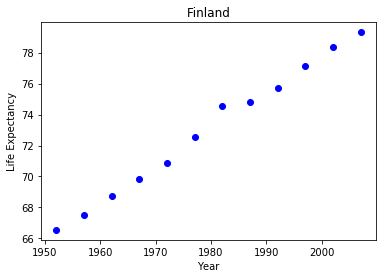

In [80]:
plot_country_lifeExp('Finland')

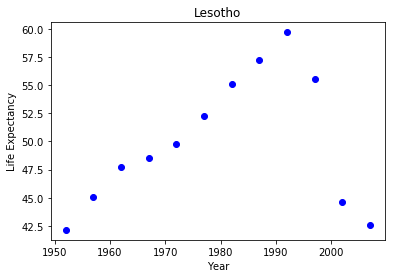

In [81]:
plot_country_lifeExp('Lesotho')

In [118]:
def plot_countries_list(A):
    for entry in A:
        plt.plot(df.year[df["country"]==entry],df.lifeExp[df["country"]==entry])
        plt.xlabel('Year')
        plt.ylabel('Life Expectancy')
    plt.legend(A,loc='lower right',ncol=2)
    plt.title('Comparison of Country Life Expectancy')

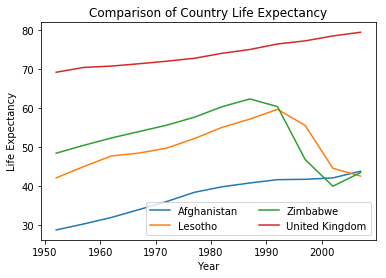

In [119]:
plot_countries_list({"Afghanistan","United Kingdom","Lesotho","Zimbabwe"})

In [144]:
def plot_count_list(A,b):
    '''
    This function plots a property, supplied as b, of selected countries, supplied as a list in A
    Example:
        plot_count_list({"Germany","France"},"pop")
    Returns a plot of the populations of Germany and France through time
    '''
    for entry in A:
        yseries = eval("df"+"."+b)
        plt.plot(df.year[df["country"]==entry],yseries[df["country"]==entry])
        plt.xlabel('Year')
        plt.ylabel(b)
        plt.legend(A,loc='upper left',ncol=2)
        plt.title('Comparison of Countries')

In [146]:
plot_count_list({"Germany","France"},"pop")

TypeError: 'method' object is not subscriptable

In [147]:
b="pop"
eval("df"+"."+b)

<bound method NDFrame.pop of           country  year         pop continent  lifeExp    gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801   779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332   820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997   853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020   836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088   739.981106
5     Afghanistan  1977  14880372.0      Asia   38.438   786.113360
6     Afghanistan  1982  12881816.0      Asia   39.854   978.011439
7     Afghanistan  1987  13867957.0      Asia   40.822   852.395945
8     Afghanistan  1992  16317921.0      Asia   41.674   649.341395
9     Afghanistan  1997  22227415.0      Asia   41.763   635.341351
10    Afghanistan  2002  25268405.0      Asia   42.129   726.734055
11    Afghanistan  2007  31889923.0      Asia   43.828   974.580338
12        Albania  1952   1282697.0    Europe   55.230  1601.056136
13        Albania  

In [154]:
df.pop

<bound method NDFrame.pop of           country  year         pop continent  lifeExp    gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801   779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332   820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997   853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020   836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088   739.981106
5     Afghanistan  1977  14880372.0      Asia   38.438   786.113360
6     Afghanistan  1982  12881816.0      Asia   39.854   978.011439
7     Afghanistan  1987  13867957.0      Asia   40.822   852.395945
8     Afghanistan  1992  16317921.0      Asia   41.674   649.341395
9     Afghanistan  1997  22227415.0      Asia   41.763   635.341351
10    Afghanistan  2002  25268405.0      Asia   42.129   726.734055
11    Afghanistan  2007  31889923.0      Asia   43.828   974.580338
12        Albania  1952   1282697.0    Europe   55.230  1601.056136
13        Albania  